# Chapter 4

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img  # jpg file needs pillow installed. Be aware the kernel isn't in datacamp, its in base
import seaborn as sns
from io import StringIO
from urllib.request import urlretrieve

In [6]:
url_str = 'https://assets.datacamp.com/production/repositories/3842/datasets/57d0d6d409bfd543e86c7f7398239fa0722e9b48/batman.jpg'
url_file = 'batman.jpg'
urlretrieve(url_str, url_file)

r = []
g = []
b = []

In [7]:
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
for pixel in batman_image:
    for temp_r, temp_g, temp_b in pixel:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


In [13]:
from scipy.cluster.vq import kmeans, vq, whiten

batman_df = pd.DataFrame({'r': r,
                           'g': g,
                           'b': b})
batman_df['scaled_red'] = batman_df['r']/batman_df['r'].std()
batman_df['scaled_green'] = batman_df['g']/batman_df['g'].std()
batman_df['scaled_blue'] = batman_df['b']/batman_df['b'].std()

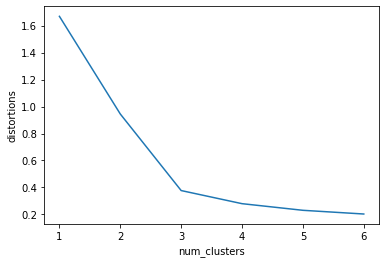

In [15]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_green', 'scaled_blue']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()